In [1]:
import pandas as pd
import numpy as np
np.random.seed(0)
from scipy.stats import beta as sp_beta

import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
plt.rcParams['figure.figsize'] = 20, 13
plt.rcParams['font.size'] = 20
plt.rcParams['lines.linewidth'] = 2
import seaborn as sns

import sys
sys.path.insert(0, '../../..')
import assignment
import leximin_assignment
import matrix_gen

from tqdm import tqdm

import warnings

In [9]:
N = 15
N_INTVS = 15
N_EXPERIMENTS = 500
CAPACITIES = np.ones((N_INTVS,), dtype=int) * (N // N_INTVS)

ALPHAS = [0.1, 0.3, 1, 3, 10, 30, 100]
BETAS = [0.1, 0.3, 1, 3, 10, 30, 100]

In [10]:
pof_pop = [[[] for __ in BETAS] for _ in ALPHAS]

for a_id, a in enumerate(ALPHAS):
    for b_id, b in enumerate(BETAS):
        print(a, b)
        
        matrix_generator = matrix_gen.MatrixGenerator(
            np.random.beta, (a, b), N, N_INTVS
        )
        
        success_count = 0
        while success_count < N_EXPERIMENTS:
            # print(a, b, success_count)
            
            (_, sorted_matrix), __ = matrix_generator.get_increase_matrix_pair(
                round_=False
            )

            _, counts = np.unique(sorted_matrix, return_counts=True)
            if np.any(counts > 1):
                continue


            # Efficient
            eff_assigner = assignment.AssignmentHelperV2(
                sorted_matrix, CAPACITIES
            )
            eff_assignments = eff_assigner.ip_solve()
            eff_cost = eff_assigner.get_cost(
                eff_assignments, cost_matrix=sorted_matrix
            )

            # Leximin
            lex_assigner = leximin_assignment.RowSortedLeximinAssignmentHelper(
                sorted_matrix, CAPACITIES
            )
            lex_assignments = lex_assigner.solve()
            lex_cost = eff_assigner.get_cost(
                lex_assignments, cost_matrix=sorted_matrix
            )


            pof_pop[a_id][b_id].append(lex_cost / eff_cost)
            success_count += 1

0.1 0.1
0.1 0.3
0.1 1


KeyboardInterrupt: 

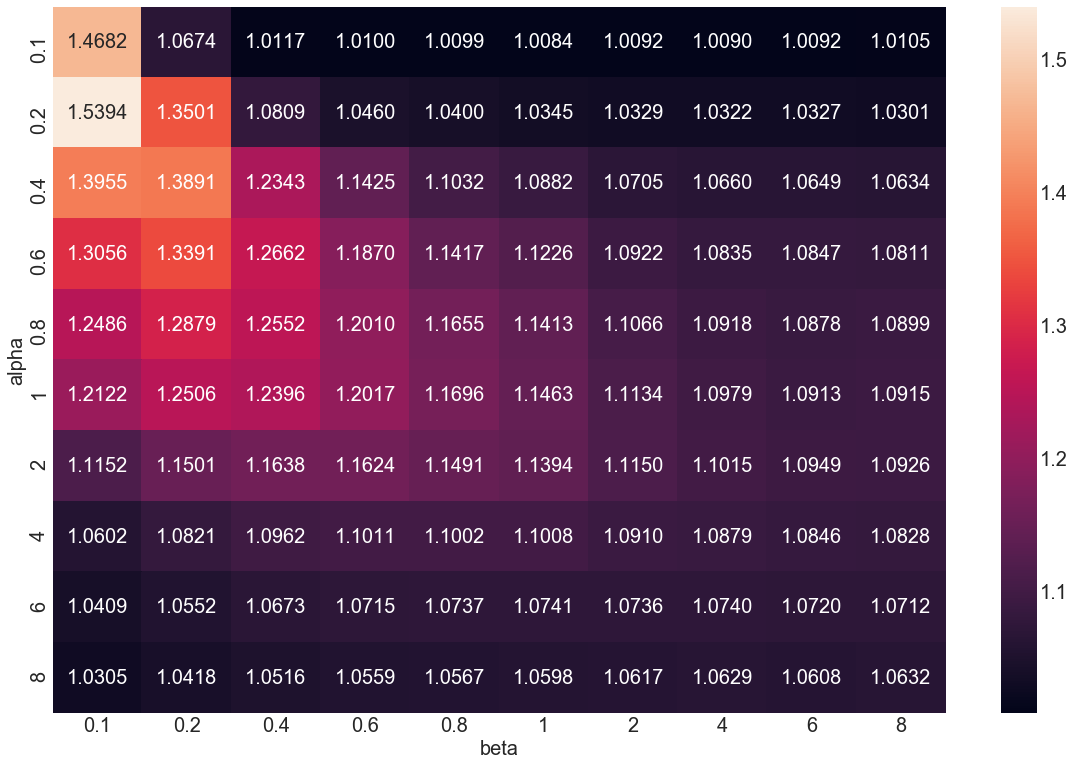

In [6]:
sns.heatmap(
    np.mean(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

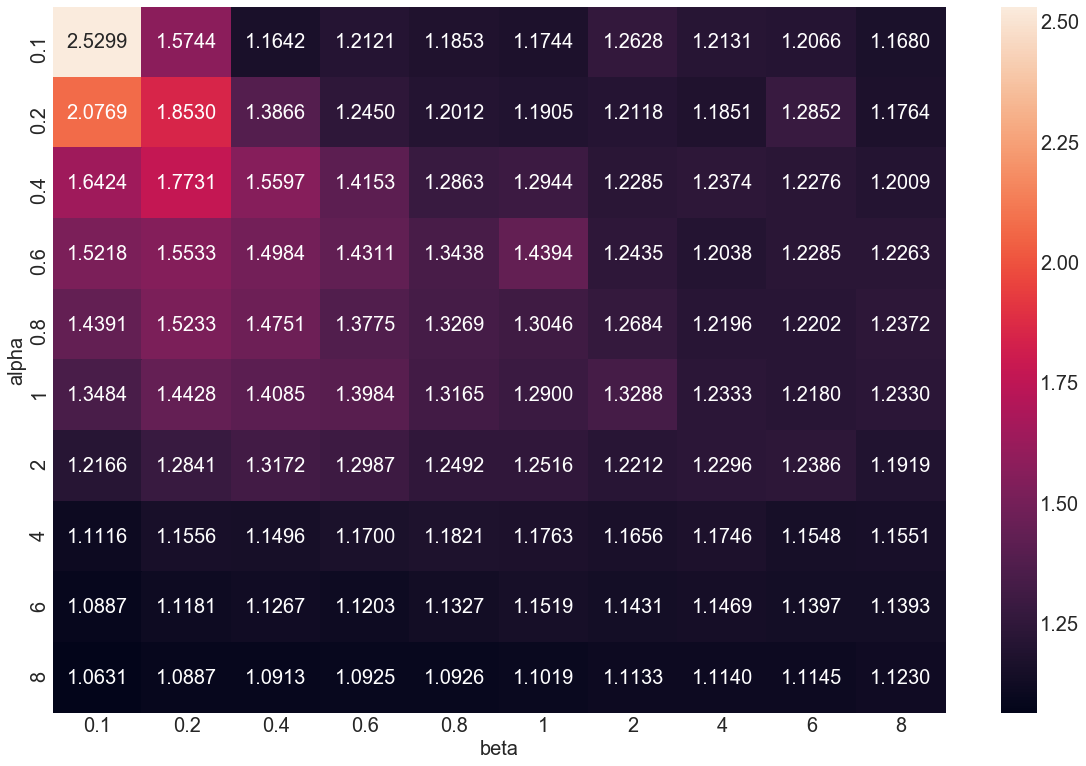

In [7]:
sns.heatmap(
    np.max(pof_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

# C(L_u) / C(L_n)

In [11]:
cost_ratio_pop = [[[] for __ in BETAS] for _ in ALPHAS]

for a_id, a in enumerate(ALPHAS):
    for b_id, b in enumerate(BETAS):
        print(a, b)
        
        matrix_generator = matrix_gen.MatrixGenerator(
            np.random.beta, (a, b), N, N_INTVS
        )
        
        success_count = 0
        while success_count < N_EXPERIMENTS:
            # print(a, b, success_count)
            
            (_, sorted_matrix), (__, sorted_increase_matrix) = matrix_generator.get_increase_matrix_pair(
                round_=False
            )

            _, counts = np.unique(sorted_matrix, return_counts=True)
            if np.any(counts > 1):
                continue


            # Norm leximin
            lex_n_assigner = leximin_assignment.RowSortedLeximinAssignmentHelper(
                sorted_increase_matrix, CAPACITIES
            )
            lex_n_assignments = lex_n_assigner.solve()
            lex_n_cost = lex_n_assigner.get_cost(
                lex_n_assignments, cost_matrix=sorted_matrix
            )
            
            # Un-norm Leximin
            lex_u_assigner = leximin_assignment.RowSortedLeximinAssignmentHelper(
                sorted_matrix, CAPACITIES
            )
            lex_u_assignments = lex_u_assigner.solve()
            lex_u_cost = lex_u_assigner.get_cost(
                lex_u_assignments, cost_matrix=sorted_matrix
            )


            cost_ratio_pop[a_id][b_id].append(lex_u_cost / lex_n_cost)
            success_count += 1

0.1 0.1
0.1 0.3
0.1 1
0.1 3
0.1 10
0.1 30
0.1 100
0.3 0.1
0.3 0.3
0.3 1
0.3 3
0.3 10
0.3 30
0.3 100
1 0.1
1 0.3
1 1
1 3
1 10
1 30
1 100
3 0.1
3 0.3
3 1
3 3
3 10
3 30
3 100
10 0.1
10 0.3
10 1
10 3
10 10
10 30
10 100
30 0.1
30 0.3
30 1
30 3
30 10
30 30
30 100
100 0.1
100 0.3
100 1
100 3
100 10
100 30
100 100


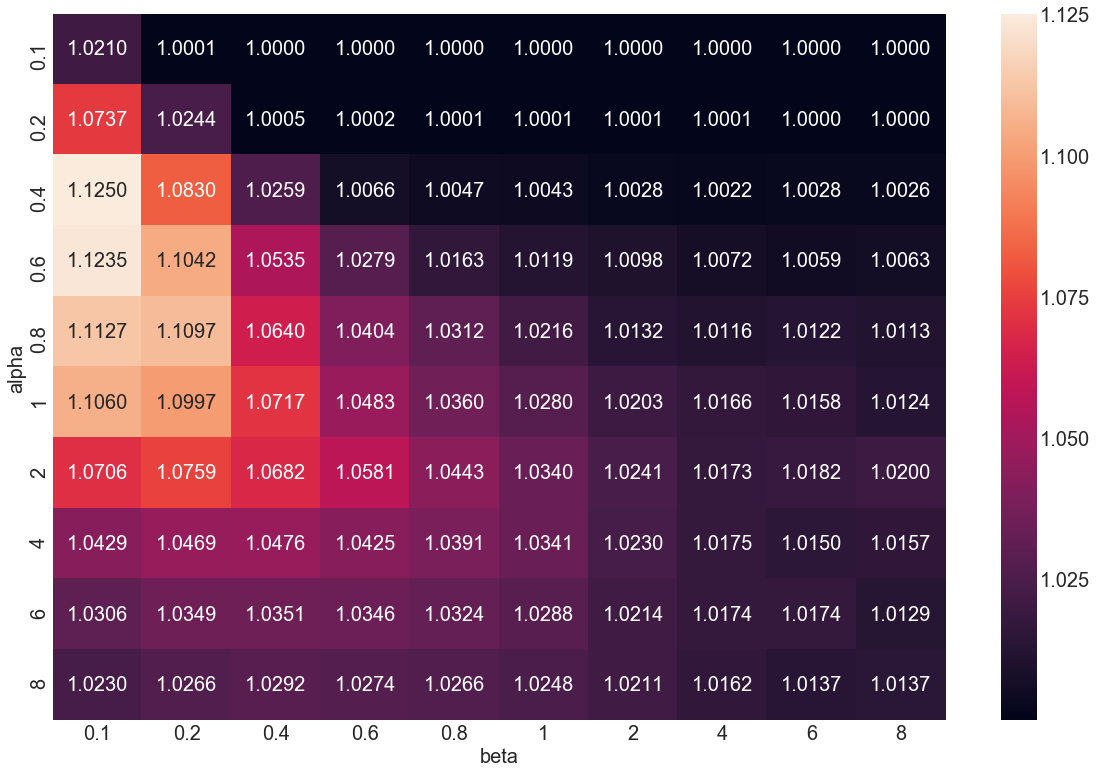

In [8]:
sns.heatmap(
    np.mean(cost_ratio_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()

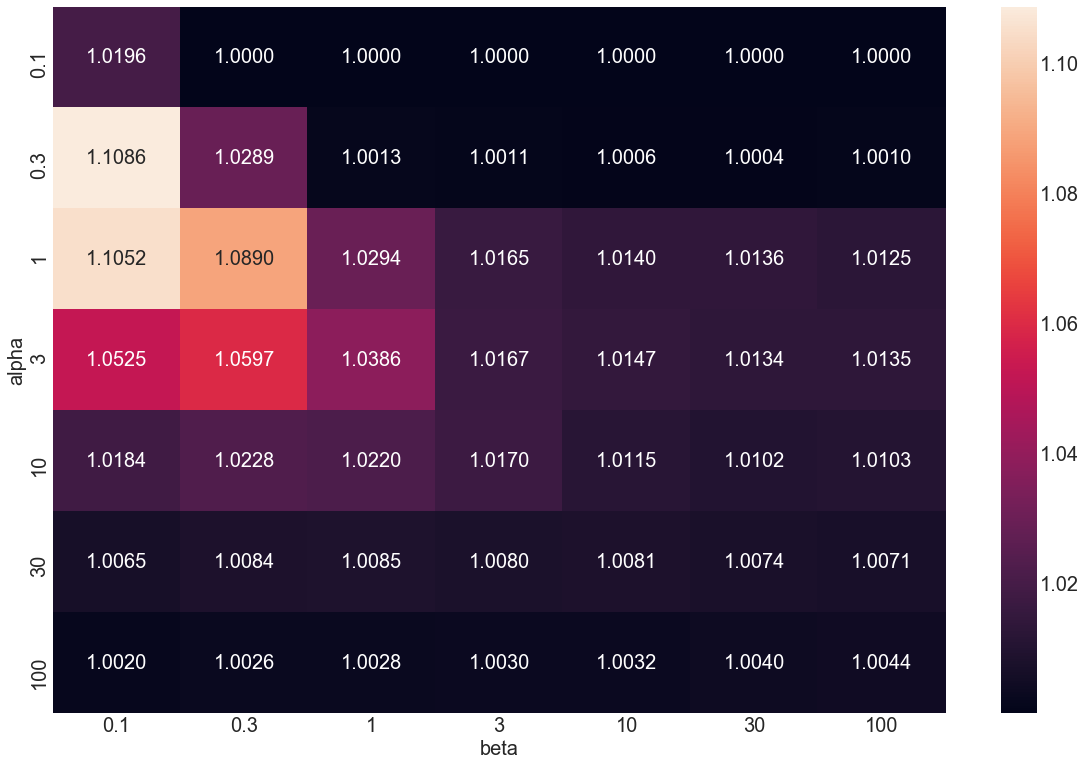

In [12]:
sns.heatmap(
    np.mean(cost_ratio_pop, axis=2),
    annot=True, fmt='.4f',
    xticklabels=BETAS, yticklabels=ALPHAS
)
plt.ylabel('alpha')
plt.xlabel('beta')

plt.show()